# Calibration of GC for Sampling CO2 and Cyclopentane

Thanks to Marla Gilbert for preparing CO2-cyclopentane vapor samples in Tedlar bags as well as cyclopentane-heptane liquid samples in vials for calibration. Additionally, thanks to Dr. James Griffith for preparing some of the Tedlar bags, setting up GC, and assisting with sampling and calibration.

In [1]:
import numpy as np
import pandas as pd

import tern
import plot

from importlib import reload
reload(plot)


<module 'plot' from 'C:\\Users\\Andy.DESKTOP-CFRG05F\\OneDrive - California Institute of Technology\\Documents\\Research\\Kornfield\\ANALYSIS\\ternary_system\\plot.py'>

## Plot Calibration Curves

Below, we plot each of the calibration curves: cyclopentane and CO2, front (liquid) and back (vapor).

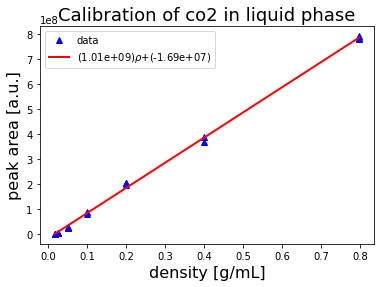

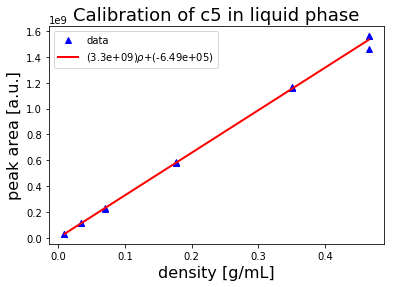

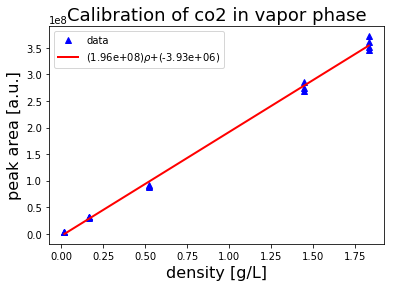

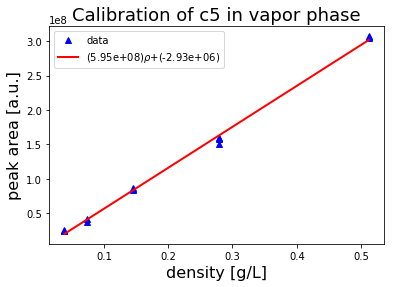

In [3]:
# quantity to plot
quantity = 'rho'
# phase dictionary to convert signal to phase
phase_dict = {'f':'liquid', 'b':'vapor'}

# loop through each signal and compound
for signal in ['f', 'b']:
    for compound in ['co2', 'c5']:
        pa, rho = tern.get_calib_data(signal, compound, quantity)
        if signal=='b':
            rho *= 1000
            units = 'g/L'
        else: 
            units = 'g/mL'
        ax = plot.plot_line(rho, pa, xlabel='density [{0:s}]'.format(units), 
                            ylabel='peak area [a.u.]', title='Calibration of ' + compound + \
                            ' in ' + phase_dict[signal] + ' phase', marker='^', label='data',
                           t_fs=18)
        a, b = np.polyfit(rho, pa, 1)
        rho_interp = np.linspace(np.min(rho), np.max(rho), 10)
        pa_interp = a*rho_interp + b
        ax = plot.plot_line(rho_interp, pa_interp, lw=2, marker='', label=(r'({0:.3g})$\rho$' + \
                            '+({1:.3g})').format(a, b), ax=ax, color='r', show_legend=True)